In [12]:
#First, load in the necessary libraries - we're going to use Pandas to explore and preprocess the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
pd.set_option('display.max_columns', None)

In [13]:
#Next, load in the dataset from the url below. After doing so, print out each column and it's related data type (dtype) as well as a small data sample
#The dataset is a breakdown of charges to an individual's insurance, and includes characteristics of the individual that are age, sex, bmi, # of children, smoker, and region.
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
display(df.head())
print('-----------------')
for c in df:
    print(c, df[c].dtype)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


-----------------
age int64
sex object
bmi float64
children int64
smoker object
region object
charges float64


In [14]:
df['smoker'] = df['smoker'].replace({'yes': True, 'no': False})
df['charges'] = df['charges'].round(1)
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.9
1,18,male,33.770,1,False,southeast,1725.6
2,28,male,33.000,3,False,southeast,4449.5
3,33,male,22.705,0,False,northwest,21984.5
4,32,male,28.880,0,False,northwest,3866.9


findfont: Font family ['keyboard'] not found. Falling back to DejaVu Sans.
findfont: Font family ['keyboard'] not found. Falling back to DejaVu Sans.


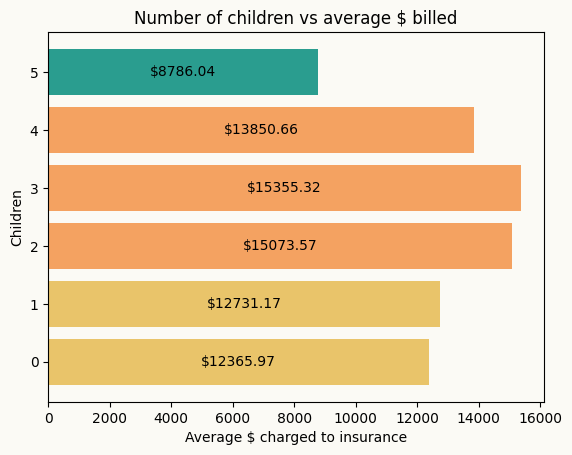

In [84]:
soft_white = '#FBFAF5'
low_color = '#2a9d8f'
medium_color = '#e9c46a'
high_color = '#f4a261'
plt.rcParams["font.family"] = "keyboard"
#Get mean charges for each group
def create_bar_chart(col: str, title: str, bar_colors: list=None, save_path: str=None) -> None:
    #Get the data for the specified column
    colData = df.groupby(col)['charges'].mean()
    xData = colData.index
    yData = colData.values

    #Set facecolor and get axes
    plt.figure(facecolor=soft_white)
    ax = plt.axes()

    #Plot and then set axes label and graph title and text
    bars = plt.barh(xData, yData, color=bar_colors)
    ax.bar_label(bars, label_type='center', fmt='$%.2f')
    ax.set_ylabel(col.capitalize())
    ax.set_xlabel('Average $ charged to insurance')
    ax.set_title(title)

    #Set color and save
    ax.set_facecolor(soft_white)

    plt.savefig(save_path)
    # ax.legend()
    

create_bar_chart('children', title='Number of children vs average $ billed', bar_colors=[medium_color, medium_color, high_color, high_color, high_color, low_color], save_path='figures/children_avg.png')